In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [278]:
df_train_est_A = pd.read_csv('train_est_B.csv')
df_train_obs_A = pd.read_csv('train_obs_B.csv')
df_test_A = pd.read_csv('X_test_B.csv')
df_train_est_A = df_train_est_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_train_obs_A = df_train_obs_A.rename(columns={'Unnamed: 0': 'date_forecast'})

df_test_A = df_test_A.rename(columns={'Unnamed: 0': 'date_forecast'})

#df_train_est_A.set_index('date_forecast', inplace=True)
#df_train_obs_A.set_index('date_forecast', inplace=True)
df_test_A.set_index('date_forecast', inplace=True)
df_train_obs_A.index = pd.to_datetime(df_train_obs_A.index)
df_train_est_A.index = pd.to_datetime(df_train_est_A.index)


In [304]:
df = pd.concat([df_train_obs_A,df_train_est_A])
df = df.drop(columns = 'date_calc', axis = 1)
#df_test_A = df_test_A.drop(columns = 'date_calc', axis = 1)


In [305]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df_test_A = df_test_A.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [177]:
df.isna().sum()
df1 = df.drop(columns=['ceiling_height_aglm','cloud_base_aglm','snow_densitykgm3'])

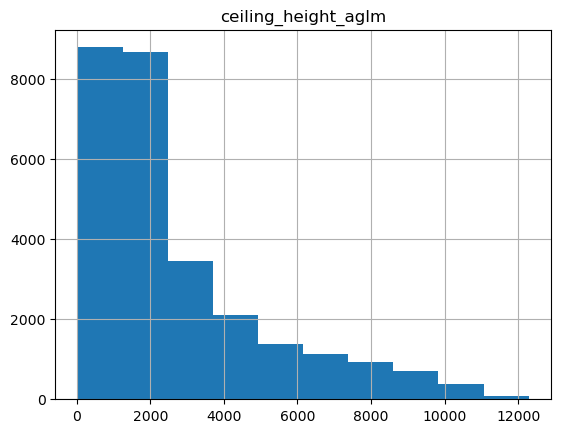

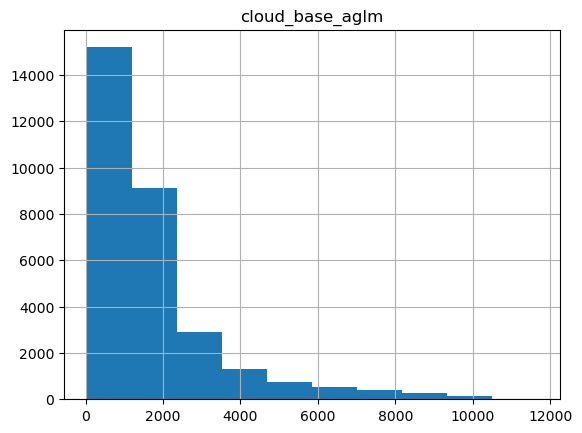

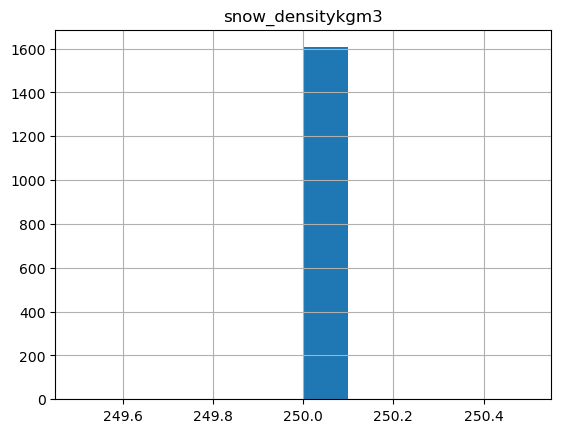

In [178]:
cols = ['ceiling_height_aglm','cloud_base_aglm','snow_densitykgm3']

# Crea gli istogrammi
for col in cols:
    df[col].hist()
    plt.title(col)
    plt.show()

In [179]:
df['snow_densitykgm3'].fillna(0)

date_forecast
2019-01-01 00:00:00    0.0
2019-01-01 01:00:00    0.0
2019-01-01 02:00:00    0.0
2019-01-01 03:00:00    0.0
2019-01-01 04:00:00    0.0
                      ... 
2023-04-30 19:00:00    0.0
2023-04-30 20:00:00    0.0
2023-04-30 21:00:00    0.0
2023-04-30 22:00:00    0.0
2023-04-30 23:00:00    0.0
Name: snow_densitykgm3, Length: 32847, dtype: float64

In [180]:
for col in df.columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [197]:
df.fillna(0)

,absolute_humidity_2mgm3,air_density_2mkgm3,clear_sky_energy_1hJ,clear_sky_radW,dew_or_rimeidx,dew_point_2mK,diffuse_radW,diffuse_rad_1hJ,direct_radW,direct_rad_1hJ,...,visibilitym,wind_speed_10mms,wind_speed_u_10mms,wind_speed_v_10mms,wind_speed_w_1000hPams,pv_measurement,hours,day,month,year
date_forecast,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-0.152882,-0.483196,-0.628353,-0.62678,-0.079737,0.013413,-0.652385,-0.660086,-0.446449,-0.452135,...,-0.916630,-0.183400,0.170290,1.060762,-0.017316,0.000000,0,1,1,2019
2019-01-01 01:00:00,-0.190299,-0.483196,-0.628353,-0.62678,-0.079737,-0.035078,-0.652385,-0.660086,-0.446449,-0.452135,...,-1.143897,0.228052,0.287874,1.409527,-0.017316,0.000000,1,1,1,2019
2019-01-01 02:00:00,-0.199653,-0.518907,-0.628353,-0.62678,-0.079737,-0.038808,-0.652385,-0.660086,-0.446449,-0.452135,...,-1.235747,0.488638,0.497844,1.530254,-0.017316,0.000000,2,1,1,2019
2019-01-01 03:00:00,-0.218360,-0.483196,-0.628353,-0.62678,-0.079737,-0.057458,-0.652385,-0.660086,-0.446449,-0.452135,...,-1.479340,0.968666,0.926184,1.570496,-0.017316,0.000000,3,1,1,2019
2019-01-01 04:00:00,-0.096758,-0.547476,-0.628353,-0.62678,-0.079737,0.065633,-0.652385,-0.660086,-0.446449,-0.452135,...,-1.547724,1.599560,1.648484,0.872965,-0.017316,0.000000,4,1,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-30 19:00:00,-0.517689,0.566704,-0.524803,-0.60818,-0.079737,-0.393162,-0.605409,-0.396312,-0.445569,-0.419337,...,-0.545948,1.119532,1.388120,0.725410,-0.017316,0.828587,19,30,4,2023
2023-04-30 20:00:00,-0.536397,0.630986,-0.625569,-0.62678,-0.079737,-0.411812,-0.652385,-0.636403,-0.446449,-0.451697,...,-0.665258,0.831515,1.127756,0.926621,-0.017316,-0.000000,20,30,4,2023
2023-04-30 21:00:00,-0.536397,0.638126,-0.628353,-0.62678,-0.079737,-0.411812,-0.652385,-0.660086,-0.446449,-0.452135,...,-0.673591,0.721795,0.984976,1.087590,-0.017316,-0.000000,21,30,4,2023


In [182]:
# Calcola la percentuale di outliers
def calc_outlier_percentage(df, col, threshold=3):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return ((df[col] < lower_bound) | (df[col] > upper_bound)).sum() / len(df)

# Calcola la percentuale di outliers per ciascuna colonna
outlier_percentages = []
for col in df.columns:
    outlier_percentages.append(calc_outlier_percentage(df, col))

# Stampa la percentuale di outliers per ciascuna colonna
print(outlier_percentages)

[0.0, 9.133254178463786e-05, 0.006180168660760496, 0.0, 0.0, 0.03507169604530094, 0.017931622370383902, 0.0, 0.005388619965293634, 0.004779736353396048, 0.1444880811032971, 0.13797302645599294, 0.0, 0.0, 0.05105489085761257, 0.01665296678539897, 0.07647578165433677, 0.0248424513654215, 0.03464547751697263, 0.0, 0.0, 0.00033488598654367216, 0.08676591469540597, 0.08676591469540597, 0.00033488598654367216, 0.00033488598654367216, 0.005784394313027065, 0.07656711419612142, 0.0, 0.00033488598654367216, 0.0, 0.04889335403537614, 9.133254178463786e-05, 0.006545498827899047, 0.05857460346454775, 0.0, 0.0, 0.016500745882424575, 0.0, 0.0, 0.0, 9.133254178463786e-05, 0.0, 3.044418059487929e-05, 0.00036533016713855145, 0.08414771516424635]


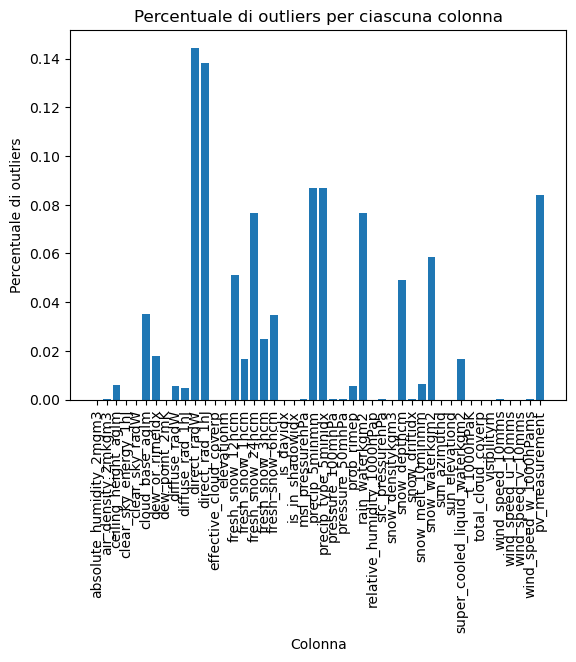

In [183]:
plt.bar(range(len(outlier_percentages)), outlier_percentages)
plt.xticks(range(len(outlier_percentages)), df.columns, rotation = 90)
plt.xlabel("Colonna")
plt.ylabel("Percentuale di outliers")
plt.title("Percentuale di outliers per ciascuna colonna")
plt.show()

In [184]:
scaling_columns = df1.drop(columns = 'pv_measurement').columns
scaling_columns

Index(['absolute_humidity_2mgm3', 'air_density_2mkgm3', 'clear_sky_energy_1hJ',
       'clear_sky_radW', 'dew_or_rimeidx', 'dew_point_2mK', 'diffuse_radW',
       'diffuse_rad_1hJ', 'direct_radW', 'direct_rad_1hJ',
       'effective_cloud_coverp', 'elevationm', 'fresh_snow_12hcm',
       'fresh_snow_1hcm', 'fresh_snow_24hcm', 'fresh_snow_3hcm',
       'fresh_snow_6hcm', 'is_dayidx', 'is_in_shadowidx', 'msl_pressurehPa',
       'precip_5minmm', 'precip_type_5minidx', 'pressure_100mhPa',
       'pressure_50mhPa', 'prob_rimep', 'rain_waterkgm2',
       'relative_humidity_1000hPap', 'sfc_pressurehPa', 'snow_depthcm',
       'snow_driftidx', 'snow_melt_10minmm', 'snow_waterkgm2', 'sun_azimuthd',
       'sun_elevationd', 'super_cooled_liquid_waterkgm2', 't_1000hPaK',
       'total_cloud_coverp', 'visibilitym', 'wind_speed_10mms',
       'wind_speed_u_10mms', 'wind_speed_v_10mms', 'wind_speed_w_1000hPams'],
      dtype='object')

In [185]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
df =pd.DataFrame( norm.fit_transform(df[scaling_columns]), columns = df[scaling_columns].columns, index = df.index)
df_test_A =pd.DataFrame( norm.fit_transform(df_test_A[scaling_columns]), columns = df_test_A[scaling_columns].columns, index = df_test_A.index)

In [186]:
df['pv_measurement'] = df1['pv_measurement']

In [187]:
df.index = pd.to_datetime(df.index)
df['hours'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df_test_A.index = pd.to_datetime(df_test_A.index)
df_test_A['hours'] = df_test_A.index.hour
df_test_A['day'] = df_test_A.index.day
df_test_A['month'] = df_test_A.index.month
df_test_A['year'] = df_test_A.index.year


In [188]:
import lightgbm as lgb
model = lgb.LGBMRegressor(importance_type='split')

In [189]:
X_train = df.drop(columns = 'pv_measurement')
y_train = df['pv_measurement']

In [198]:
model.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7442
[LightGBM] [Info] Number of data points in the train set: 32847, number of used features: 43
[LightGBM] [Info] Start training from score 96.815935


LGBMRegressor()

In [199]:
feature_importance = model.feature_importances_
# Define a threshold for feature importance
threshold = 0.0005  # Adjust this value as needed

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# Filter features above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] >= threshold]['Feature']

# Create a new DataFrame with the selected features
X_selected = X_train[selected_features]
X_selected['pv_measurement'] = df['pv_measurement']


In [207]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Sample DataFrame (replace this with your own dataset)
data = X_selected

# Define the number of splits (e.g., 5 for 80-20 train-test splits)
n_splits = 3


# Initialize the TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=n_splits)
data = data.fillna(0)

In [208]:
def objective(trial):
    param = {
            'metric': 'mae', 
            'random_state': 42,
            'n_estimators': trial.suggest_int('n_estimators',10,1000),
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
            'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
            'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4,1e-1),
            'max_depth': trial.suggest_int('max_depth', 1,50),
            'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
            'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
            'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100),
            'verbosity': -1
        }
    model = lgb.LGBMRegressor(**param)
    for train_index, test_index in tscv.split(data):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]

        # Extract target variable for training and testing data
        y_train = train_data['pv_measurement']
        y_test = test_data['pv_measurement']

        # Extract features for training and testing data
        X_train = train_data.drop(columns = 'pv_measurement')
        X_test = test_data.drop(columns = 'pv_measurement')
        
        # Train the XGBoost model
        model.fit(X_train, y_train,eval_set=[(X_test,y_test)])

        # Make predictions on the test data
        y_pred = model.predict(X_test)

        # Evaluate the model using Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred)
        print("Mean Absolute Error:", mae)

    return mae

In [209]:
import optuna
import warnings
warnings.filterwarnings("ignore")
from warnings import simplefilter
simplefilter("ignore", category=RuntimeWarning)
study = optuna.create_study(direction='minimize')

[I 2023-10-26 19:31:25,368] A new study created in memory with name: no-name-1f820d54-97ae-4133-a22d-9cf8a7431b8f


In [210]:
study.optimize(objective, n_trials=50)

Mean Absolute Error: 63.644502719563526
Mean Absolute Error: 65.82720003362756


[I 2023-10-26 19:31:35,012] Trial 0 finished with value: 34.46095357903298 and parameters: {'n_estimators': 661, 'reg_alpha': 0.13922984532894775, 'reg_lambda': 0.10724451390046855, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.05262235414925764, 'max_depth': 22, 'num_leaves': 696, 'min_child_samples': 96, 'min_data_per_groups': 82}. Best is trial 0 with value: 34.46095357903298.


Mean Absolute Error: 34.46095357903298
Mean Absolute Error: 133.54919403241402
Mean Absolute Error: 145.39691647507968


[I 2023-10-26 19:31:36,370] Trial 1 finished with value: 119.33000224779241 and parameters: {'n_estimators': 95, 'reg_alpha': 0.002679293009432787, 'reg_lambda': 1.08839668979576, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.0001345743611758894, 'max_depth': 18, 'num_leaves': 760, 'min_child_samples': 207, 'min_data_per_groups': 55}. Best is trial 0 with value: 34.46095357903298.


Mean Absolute Error: 119.33000224779241
Mean Absolute Error: 67.34134760964766
Mean Absolute Error: 77.11830490287596


[I 2023-10-26 19:31:39,028] Trial 2 finished with value: 46.18328075644985 and parameters: {'n_estimators': 278, 'reg_alpha': 0.05290380617893333, 'reg_lambda': 0.001486858744676569, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.005532444552104703, 'max_depth': 8, 'num_leaves': 614, 'min_child_samples': 192, 'min_data_per_groups': 82}. Best is trial 0 with value: 34.46095357903298.


Mean Absolute Error: 46.18328075644985
Mean Absolute Error: 61.68133758206523
Mean Absolute Error: 65.69713959536628


[I 2023-10-26 19:31:45,787] Trial 3 finished with value: 31.97971187985254 and parameters: {'n_estimators': 786, 'reg_alpha': 0.022809579894747058, 'reg_lambda': 0.00734697505769815, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.027694410154124806, 'max_depth': 48, 'num_leaves': 38, 'min_child_samples': 12, 'min_data_per_groups': 56}. Best is trial 3 with value: 31.97971187985254.


Mean Absolute Error: 31.97971187985254
Mean Absolute Error: 112.72412926020327
Mean Absolute Error: 128.11647548940155


[I 2023-10-26 19:31:52,440] Trial 4 finished with value: 102.39282838039887 and parameters: {'n_estimators': 486, 'reg_alpha': 8.862750577062535, 'reg_lambda': 0.00316966767258415, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.0004282299129833076, 'max_depth': 18, 'num_leaves': 220, 'min_child_samples': 131, 'min_data_per_groups': 2}. Best is trial 3 with value: 31.97971187985254.


Mean Absolute Error: 102.39282838039887
Mean Absolute Error: 61.2650110144021
Mean Absolute Error: 66.0460856219403


[I 2023-10-26 19:32:00,593] Trial 5 finished with value: 30.479068255982003 and parameters: {'n_estimators': 778, 'reg_alpha': 0.6047030068734849, 'reg_lambda': 0.015210233389518778, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.004466222368364251, 'max_depth': 17, 'num_leaves': 36, 'min_child_samples': 209, 'min_data_per_groups': 24}. Best is trial 5 with value: 30.479068255982003.


Mean Absolute Error: 30.479068255982003
Mean Absolute Error: 93.97969829078748
Mean Absolute Error: 105.8383604468417


[I 2023-10-26 19:32:05,026] Trial 6 finished with value: 79.65432726855691 and parameters: {'n_estimators': 827, 'reg_alpha': 0.004327600387418941, 'reg_lambda': 4.100474678247497, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.0006661363107007448, 'max_depth': 13, 'num_leaves': 95, 'min_child_samples': 255, 'min_data_per_groups': 71}. Best is trial 5 with value: 30.479068255982003.


Mean Absolute Error: 79.65432726855691
Mean Absolute Error: 92.78425537442676
Mean Absolute Error: 108.86647728115553


[I 2023-10-26 19:32:23,832] Trial 7 finished with value: 82.60104085465952 and parameters: {'n_estimators': 541, 'reg_alpha': 0.044467219179717875, 'reg_lambda': 0.049199093714867505, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.00095231148380826, 'max_depth': 33, 'num_leaves': 211, 'min_child_samples': 21, 'min_data_per_groups': 12}. Best is trial 5 with value: 30.479068255982003.


Mean Absolute Error: 82.60104085465952
Mean Absolute Error: 93.80064325750936
Mean Absolute Error: 110.05710434287066


[I 2023-10-26 19:32:31,882] Trial 8 finished with value: 83.04461905013686 and parameters: {'n_estimators': 408, 'reg_alpha': 0.30412823717154386, 'reg_lambda': 0.007807635802037906, 'colsample_bytree': 1.0, 'subsample': 1.0, 'learning_rate': 0.0012360043341866059, 'max_depth': 23, 'num_leaves': 736, 'min_child_samples': 118, 'min_data_per_groups': 93}. Best is trial 5 with value: 30.479068255982003.


Mean Absolute Error: 83.04461905013686
Mean Absolute Error: 62.101883543056296
Mean Absolute Error: 63.946619262919896


[I 2023-10-26 19:32:47,782] Trial 9 finished with value: 31.060411108710248 and parameters: {'n_estimators': 871, 'reg_alpha': 0.005928704222826281, 'reg_lambda': 0.031469198207815956, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.016474371806544204, 'max_depth': 46, 'num_leaves': 774, 'min_child_samples': 95, 'min_data_per_groups': 40}. Best is trial 5 with value: 30.479068255982003.


Mean Absolute Error: 31.060411108710248
Mean Absolute Error: 61.57697817452676
Mean Absolute Error: 62.050629679104624


[I 2023-10-26 19:32:52,324] Trial 10 finished with value: 27.919620761200406 and parameters: {'n_estimators': 968, 'reg_alpha': 0.8838706223297346, 'reg_lambda': 0.001073998867471649, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.006575199569784167, 'max_depth': 3, 'num_leaves': 438, 'min_child_samples': 282, 'min_data_per_groups': 28}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 27.919620761200406
Mean Absolute Error: 64.34995645098395
Mean Absolute Error: 63.34172410761553


[I 2023-10-26 19:32:55,116] Trial 11 finished with value: 31.814217917183996 and parameters: {'n_estimators': 958, 'reg_alpha': 0.8265467835962038, 'reg_lambda': 0.0010425370571721228, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.006274085251611874, 'max_depth': 1, 'num_leaves': 256, 'min_child_samples': 288, 'min_data_per_groups': 28}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.814217917183996
Mean Absolute Error: 66.29720934898755
Mean Absolute Error: 69.59074073720059


[I 2023-10-26 19:32:57,979] Trial 12 finished with value: 41.87315264071485 and parameters: {'n_estimators': 975, 'reg_alpha': 1.0970265429715214, 'reg_lambda': 0.008775707434518323, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.003776813641834778, 'max_depth': 1, 'num_leaves': 432, 'min_child_samples': 236, 'min_data_per_groups': 25}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 41.87315264071485
Mean Absolute Error: 62.27868551450196
Mean Absolute Error: 64.64395452810038


[I 2023-10-26 19:33:07,293] Trial 13 finished with value: 32.297217037701806 and parameters: {'n_estimators': 686, 'reg_alpha': 2.0235211425307176, 'reg_lambda': 0.0012969736632762775, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.011122480045258063, 'max_depth': 34, 'num_leaves': 959, 'min_child_samples': 288, 'min_data_per_groups': 36}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 32.297217037701806
Mean Absolute Error: 68.0639096042204
Mean Absolute Error: 76.88270028236727


[I 2023-10-26 19:33:13,964] Trial 14 finished with value: 46.48446449594474 and parameters: {'n_estimators': 704, 'reg_alpha': 0.26426731898249983, 'reg_lambda': 0.019658405778408675, 'colsample_bytree': 0.4, 'subsample': 0.7, 'learning_rate': 0.002132802011820147, 'max_depth': 9, 'num_leaves': 448, 'min_child_samples': 179, 'min_data_per_groups': 15}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 46.48446449594474
Mean Absolute Error: 65.46736368411598
Mean Absolute Error: 67.19732996241457


[I 2023-10-26 19:33:27,076] Trial 15 finished with value: 37.38629081125519 and parameters: {'n_estimators': 957, 'reg_alpha': 3.095341627897538, 'reg_lambda': 0.11775491382986286, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.08020193571950582, 'max_depth': 31, 'num_leaves': 336, 'min_child_samples': 243, 'min_data_per_groups': 41}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 37.38629081125519
Mean Absolute Error: 68.96916954096967
Mean Absolute Error: 78.82422536454158


[I 2023-10-26 19:33:32,058] Trial 16 finished with value: 48.07817486843743 and parameters: {'n_estimators': 578, 'reg_alpha': 0.5280854323963255, 'reg_lambda': 0.0034265422776604756, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.002513458179059319, 'max_depth': 7, 'num_leaves': 579, 'min_child_samples': 299, 'min_data_per_groups': 18}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 48.07817486843743
Mean Absolute Error: 61.65430257672623
Mean Absolute Error: 64.57201035571072


[I 2023-10-26 19:33:42,037] Trial 17 finished with value: 31.88362092260391 and parameters: {'n_estimators': 811, 'reg_alpha': 0.1382695754824352, 'reg_lambda': 0.3315884986475483, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.010939627366275139, 'max_depth': 14, 'num_leaves': 931, 'min_child_samples': 165, 'min_data_per_groups': 1}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.88362092260391
Mean Absolute Error: 98.25043924733038


[I 2023-10-26 19:33:42,374] Trial 18 finished with value: 86.90037284308134 and parameters: {'n_estimators': 20, 'reg_alpha': 3.8644304136559344, 'reg_lambda': 0.017313648428950307, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.023813882586308, 'max_depth': 41, 'num_leaves': 5, 'min_child_samples': 218, 'min_data_per_groups': 50}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 110.28817070667938
Mean Absolute Error: 86.90037284308134
Mean Absolute Error: 62.4801538287575
Mean Absolute Error: 68.20970091965607


[I 2023-10-26 19:33:46,065] Trial 19 finished with value: 35.38651684833068 and parameters: {'n_estimators': 336, 'reg_alpha': 1.0317848849922, 'reg_lambda': 0.05389996146113581, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.007684340419719589, 'max_depth': 29, 'num_leaves': 351, 'min_child_samples': 268, 'min_data_per_groups': 29}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 35.38651684833068
Mean Absolute Error: 61.21721146173129
Mean Absolute Error: 65.11685868247841


[I 2023-10-26 19:33:50,751] Trial 20 finished with value: 30.571650730931864 and parameters: {'n_estimators': 882, 'reg_alpha': 0.3827020109891501, 'reg_lambda': 0.0034236931841289276, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.0035475713180753215, 'max_depth': 5, 'num_leaves': 120, 'min_child_samples': 223, 'min_data_per_groups': 47}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 30.571650730931864
Mean Absolute Error: 61.338921814661475
Mean Absolute Error: 65.15553476001735


[I 2023-10-26 19:33:57,234] Trial 21 finished with value: 31.10150542768859 and parameters: {'n_estimators': 880, 'reg_alpha': 0.4059979062236844, 'reg_lambda': 0.002881350903784699, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.003504914821651481, 'max_depth': 7, 'num_leaves': 134, 'min_child_samples': 223, 'min_data_per_groups': 63}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.10150542768859
Mean Absolute Error: 68.92062542202103
Mean Absolute Error: 77.80050912502526


[I 2023-10-26 19:34:00,668] Trial 22 finished with value: 47.80393949111894 and parameters: {'n_estimators': 757, 'reg_alpha': 1.374179299106444, 'reg_lambda': 0.004073624237843449, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.001957205904328985, 'max_depth': 4, 'num_leaves': 148, 'min_child_samples': 256, 'min_data_per_groups': 46}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 47.80393949111894
Mean Absolute Error: 60.82055442762766
Mean Absolute Error: 63.38158876874354


[I 2023-10-26 19:34:10,115] Trial 23 finished with value: 29.147077488258063 and parameters: {'n_estimators': 894, 'reg_alpha': 0.23811662540083317, 'reg_lambda': 0.001014048970283428, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.004985298214214576, 'max_depth': 13, 'num_leaves': 301, 'min_child_samples': 196, 'min_data_per_groups': 35}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 29.147077488258063
Mean Absolute Error: 61.23687828545984
Mean Absolute Error: 64.80852363371362


[I 2023-10-26 19:34:18,867] Trial 24 finished with value: 31.489744442120084 and parameters: {'n_estimators': 604, 'reg_alpha': 0.1921423951742277, 'reg_lambda': 0.0012264090799310144, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.007899454169082588, 'max_depth': 13, 'num_leaves': 532, 'min_child_samples': 152, 'min_data_per_groups': 32}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.489744442120084
Mean Absolute Error: 61.28844882214531
Mean Absolute Error: 64.52243305266366


[I 2023-10-26 19:34:31,306] Trial 25 finished with value: 31.41186193162937 and parameters: {'n_estimators': 922, 'reg_alpha': 0.7006102414433212, 'reg_lambda': 0.013273777879746313, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.00518313437987825, 'max_depth': 17, 'num_leaves': 283, 'min_child_samples': 192, 'min_data_per_groups': 21}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.41186193162937
Mean Absolute Error: 61.96987908996758
Mean Absolute Error: 63.82645097549115


[I 2023-10-26 19:34:46,142] Trial 26 finished with value: 30.934194410952188 and parameters: {'n_estimators': 743, 'reg_alpha': 0.08846348936054452, 'reg_lambda': 0.0059327814646316385, 'colsample_bytree': 0.4, 'subsample': 1.0, 'learning_rate': 0.013624090760979266, 'max_depth': 26, 'num_leaves': 418, 'min_child_samples': 62, 'min_data_per_groups': 11}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 30.934194410952188
Mean Absolute Error: 61.484214537446185
Mean Absolute Error: 64.4697316111068


[I 2023-10-26 19:34:56,956] Trial 27 finished with value: 31.03062336592816 and parameters: {'n_estimators': 991, 'reg_alpha': 0.4771137948083199, 'reg_lambda': 0.0019722020887399483, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.004362541058607605, 'max_depth': 12, 'num_leaves': 352, 'min_child_samples': 272, 'min_data_per_groups': 35}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.03062336592816
Mean Absolute Error: 61.394825491995576
Mean Absolute Error: 64.72106262780635


[I 2023-10-26 19:35:08,454] Trial 28 finished with value: 31.457236223951426 and parameters: {'n_estimators': 852, 'reg_alpha': 0.0010040268786209075, 'reg_lambda': 0.0019604800603337342, 'colsample_bytree': 0.7, 'subsample': 0.6, 'learning_rate': 0.007817978767594254, 'max_depth': 20, 'num_leaves': 474, 'min_child_samples': 166, 'min_data_per_groups': 23}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 31.457236223951426
Mean Absolute Error: 63.25156087613724
Mean Absolute Error: 65.60679634134745


[I 2023-10-26 19:35:15,778] Trial 29 finished with value: 34.73350939622275 and parameters: {'n_estimators': 623, 'reg_alpha': 0.20180188999450557, 'reg_lambda': 0.0010015259028700455, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.0424590329971293, 'max_depth': 24, 'num_leaves': 611, 'min_child_samples': 199, 'min_data_per_groups': 10}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 34.73350939622275
Mean Absolute Error: 61.86244526920128
Mean Absolute Error: 63.665793590419725


[I 2023-10-26 19:35:21,403] Trial 30 finished with value: 30.435578012237542 and parameters: {'n_estimators': 664, 'reg_alpha': 1.940497764355293, 'reg_lambda': 0.005251155838328934, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.019295741266082182, 'max_depth': 11, 'num_leaves': 192, 'min_child_samples': 127, 'min_data_per_groups': 42}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 30.435578012237542
Mean Absolute Error: 61.88588843021061
Mean Absolute Error: 63.44823530856222


[I 2023-10-26 19:35:26,872] Trial 31 finished with value: 30.209265089832602 and parameters: {'n_estimators': 665, 'reg_alpha': 1.828977766020596, 'reg_lambda': 0.005518712961479739, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.01820012414539439, 'max_depth': 11, 'num_leaves': 183, 'min_child_samples': 129, 'min_data_per_groups': 42}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 30.209265089832602
Mean Absolute Error: 61.757282665840364
Mean Absolute Error: 63.091579209899244


[I 2023-10-26 19:35:31,817] Trial 32 finished with value: 29.885260352562614 and parameters: {'n_estimators': 493, 'reg_alpha': 1.891432425406995, 'reg_lambda': 0.0021512058307416675, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.020531117226402235, 'max_depth': 11, 'num_leaves': 181, 'min_child_samples': 86, 'min_data_per_groups': 58}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 29.885260352562614
Mean Absolute Error: 62.612275362828626
Mean Absolute Error: 63.27517357172097


[I 2023-10-26 19:35:36,324] Trial 33 finished with value: 30.923914643218573 and parameters: {'n_estimators': 499, 'reg_alpha': 4.5992258190152695, 'reg_lambda': 0.002281201607353995, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.03593781008026603, 'max_depth': 10, 'num_leaves': 300, 'min_child_samples': 70, 'min_data_per_groups': 60}. Best is trial 10 with value: 27.919620761200406.


Mean Absolute Error: 30.923914643218573
Mean Absolute Error: 61.3109883581326
Mean Absolute Error: 62.16703029492807


[I 2023-10-26 19:35:37,046] Trial 34 finished with value: 26.301574073231123 and parameters: {'n_estimators': 168, 'reg_alpha': 2.198796844136297, 'reg_lambda': 0.0017874616101149997, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.026588911447302063, 'max_depth': 3, 'num_leaves': 383, 'min_child_samples': 94, 'min_data_per_groups': 69}. Best is trial 34 with value: 26.301574073231123.


Mean Absolute Error: 26.301574073231123
Mean Absolute Error: 61.440030528246034
Mean Absolute Error: 61.528550135138445


[I 2023-10-26 19:35:37,757] Trial 35 finished with value: 25.85133753530135 and parameters: {'n_estimators': 162, 'reg_alpha': 9.387308834180612, 'reg_lambda': 0.0018799205894796105, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03213149368639652, 'max_depth': 3, 'num_leaves': 513, 'min_child_samples': 43, 'min_data_per_groups': 71}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 25.85133753530135
Mean Absolute Error: 61.93598501118693
Mean Absolute Error: 63.47597812793143


[I 2023-10-26 19:35:38,923] Trial 36 finished with value: 29.441303444129847 and parameters: {'n_estimators': 199, 'reg_alpha': 8.358797146233135, 'reg_lambda': 0.0018005711561420138, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.06114131088682284, 'max_depth': 4, 'num_leaves': 537, 'min_child_samples': 28, 'min_data_per_groups': 74}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 29.441303444129847
Mean Absolute Error: 64.16227098694017
Mean Absolute Error: 61.873676255015845


[I 2023-10-26 19:35:39,611] Trial 37 finished with value: 29.817174328797403 and parameters: {'n_estimators': 170, 'reg_alpha': 6.079027401295, 'reg_lambda': 0.0010151683437418086, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.04009328341974708, 'max_depth': 1, 'num_leaves': 674, 'min_child_samples': 54, 'min_data_per_groups': 86}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 29.817174328797403
Mean Absolute Error: 63.21053875827113
Mean Absolute Error: 62.842456855704995


[I 2023-10-26 19:35:41,070] Trial 38 finished with value: 30.441556351898466 and parameters: {'n_estimators': 246, 'reg_alpha': 2.9567686604574224, 'reg_lambda': 0.0033336090392808073, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.09328714409301199, 'max_depth': 5, 'num_leaves': 399, 'min_child_samples': 34, 'min_data_per_groups': 68}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 30.441556351898466
Mean Absolute Error: 62.00459803104299
Mean Absolute Error: 69.53596526939626


[I 2023-10-26 19:35:42,646] Trial 39 finished with value: 36.482220619106805 and parameters: {'n_estimators': 94, 'reg_alpha': 9.87937331059628, 'reg_lambda': 0.001623927512039141, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.027132461793730984, 'max_depth': 7, 'num_leaves': 504, 'min_child_samples': 110, 'min_data_per_groups': 80}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 36.482220619106805
Mean Absolute Error: 62.4067458440182
Mean Absolute Error: 60.77298928882069


[I 2023-10-26 19:35:44,202] Trial 40 finished with value: 26.842555604162502 and parameters: {'n_estimators': 408, 'reg_alpha': 5.564206903219252, 'reg_lambda': 0.004764085604343497, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03335962680744742, 'max_depth': 3, 'num_leaves': 674, 'min_child_samples': 5, 'min_data_per_groups': 94}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 26.842555604162502
Mean Absolute Error: 63.0134288696698
Mean Absolute Error: 61.133100977030814


[I 2023-10-26 19:35:45,590] Trial 41 finished with value: 28.135002261830262 and parameters: {'n_estimators': 413, 'reg_alpha': 5.5558064052807685, 'reg_lambda': 0.0017492464771509248, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.053904195081928875, 'max_depth': 3, 'num_leaves': 830, 'min_child_samples': 1, 'min_data_per_groups': 97}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 28.135002261830262
Mean Absolute Error: 62.63844213214902
Mean Absolute Error: 61.776335771472496


[I 2023-10-26 19:35:46,970] Trial 42 finished with value: 28.05982405866422 and parameters: {'n_estimators': 414, 'reg_alpha': 5.495730664190585, 'reg_lambda': 0.009275509017994496, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.05463237849039891, 'max_depth': 3, 'num_leaves': 867, 'min_child_samples': 3, 'min_data_per_groups': 96}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 28.05982405866422
Mean Absolute Error: 61.960318728006676
Mean Absolute Error: 60.98167031772813


[I 2023-10-26 19:35:48,167] Trial 43 finished with value: 26.26491938966072 and parameters: {'n_estimators': 338, 'reg_alpha': 6.633118688641188, 'reg_lambda': 0.009088849004216673, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.0269103688314615, 'max_depth': 3, 'num_leaves': 845, 'min_child_samples': 44, 'min_data_per_groups': 89}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 26.26491938966072
Mean Absolute Error: 61.688196173911
Mean Absolute Error: 62.490038043374405


[I 2023-10-26 19:35:51,088] Trial 44 finished with value: 29.246703810115957 and parameters: {'n_estimators': 319, 'reg_alpha': 2.6694727120595276, 'reg_lambda': 0.005215358266177892, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03276130935289365, 'max_depth': 8, 'num_leaves': 669, 'min_child_samples': 46, 'min_data_per_groups': 90}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 29.246703810115957
Mean Absolute Error: 66.6248792034751


[I 2023-10-26 19:35:51,597] Trial 45 finished with value: 38.38354378877888 and parameters: {'n_estimators': 123, 'reg_alpha': 9.724622364504494, 'reg_lambda': 0.0029202823111185274, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03472114414922767, 'max_depth': 1, 'num_leaves': 787, 'min_child_samples': 79, 'min_data_per_groups': 79}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 68.15301509667366
Mean Absolute Error: 38.38354378877888
Mean Absolute Error: 61.85687696944605
Mean Absolute Error: 62.208172820058905


[I 2023-10-26 19:35:57,766] Trial 46 finished with value: 29.743772612349225 and parameters: {'n_estimators': 340, 'reg_alpha': 3.5834121908879295, 'reg_lambda': 0.009555324525774187, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.027690013203067507, 'max_depth': 15, 'num_leaves': 727, 'min_child_samples': 42, 'min_data_per_groups': 88}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 29.743772612349225
Mean Absolute Error: 61.173849869608134
Mean Absolute Error: 66.27582876088795


[I 2023-10-26 19:35:59,835] Trial 47 finished with value: 31.710277948198303 and parameters: {'n_estimators': 265, 'reg_alpha': 6.320694476184142, 'reg_lambda': 0.004323471391207903, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.01325100333088022, 'max_depth': 5, 'num_leaves': 622, 'min_child_samples': 19, 'min_data_per_groups': 77}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 31.710277948198303
Mean Absolute Error: 61.60382490793917
Mean Absolute Error: 62.51824260361758


[I 2023-10-26 19:36:02,371] Trial 48 finished with value: 29.148469554839593 and parameters: {'n_estimators': 451, 'reg_alpha': 4.117676119150635, 'reg_lambda': 0.007277783693322505, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.023755550942299287, 'max_depth': 6, 'num_leaves': 566, 'min_child_samples': 104, 'min_data_per_groups': 67}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 29.148469554839593
Mean Absolute Error: 62.599603666803546
Mean Absolute Error: 61.59572604372741


[I 2023-10-26 19:36:05,605] Trial 49 finished with value: 28.08017074284107 and parameters: {'n_estimators': 213, 'reg_alpha': 1.2796072195608268, 'reg_lambda': 0.002501511144012461, 'colsample_bytree': 0.3, 'subsample': 1.0, 'learning_rate': 0.06812829160563709, 'max_depth': 9, 'num_leaves': 997, 'min_child_samples': 15, 'min_data_per_groups': 84}. Best is trial 35 with value: 25.85133753530135.


Mean Absolute Error: 28.08017074284107


In [211]:
trial = study.best_trial

print("  Value: {}".format(trial.value))
print(trial.params)

  Value: 25.85133753530135
{'n_estimators': 162, 'reg_alpha': 9.387308834180612, 'reg_lambda': 0.0018799205894796105, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03213149368639652, 'max_depth': 3, 'num_leaves': 513, 'min_child_samples': 43, 'min_data_per_groups': 71}


In [212]:
param ={'n_estimators': 162, 'reg_alpha': 9.387308834180612, 'reg_lambda': 0.0018799205894796105, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.03213149368639652, 'max_depth': 3, 'num_leaves': 513, 'min_child_samples': 43, 'min_data_per_groups': 71}

In [213]:
model_A = lgb.LGBMRegressor(**param)

In [214]:
df_test_A = df_test_A[selected_features]
df_test_A.shape

(720, 35)

In [215]:
X_train = data.drop(columns = 'pv_measurement')
y_train = data['pv_measurement']
X_train.shape

(32847, 35)

In [216]:
model_A.fit(X_train,y_train)
df_test_A = df_test_A[selected_features]
y_pred_A = model_A.predict(df_test_A)
y_pred_clear = 10 ** y_pred_A - 1 

[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Warning] Unknown parameter: min_data_per_groups
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6806
[LightGBM] [Info] Number of data points in the train set: 32847, number of used features: 35
[LightGBM] [Info] Start training from score 96.815935
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

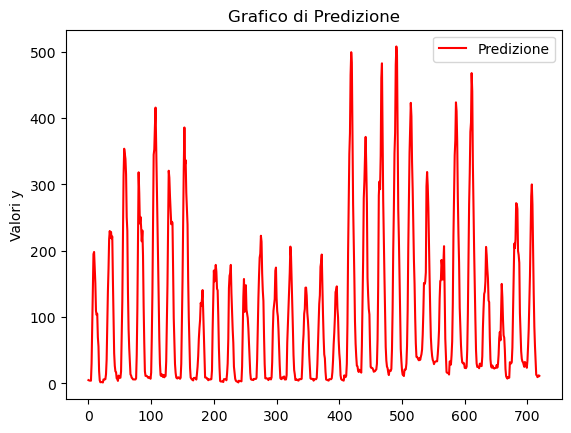

In [217]:
plt.plot(range(len(y_pred_A)), y_pred_A, label='Predizione', color='red', linestyle='-')

# Aggiungi una legenda
plt.legend()

# Aggiungi etichette agli assi
plt.ylabel('Valori y')

# Titolo del grafico
plt.title('Grafico di Predizione')

# Mostra il grafico
plt.show()

In [218]:
df = pd.DataFrame({'Prediction':y_pred_A})

In [219]:
threshold = 0.05
df['Prediction'] = df['Prediction'].apply(lambda x: 0 if x < threshold else x)

In [220]:
df.to_csv('B.csv')

In [221]:
df.head(50)


,Prediction
0,5.065644
1,4.570654
2,4.323566
3,4.323566
4,4.150902
5,30.268008
6,86.555623
7,137.526254
8,194.950658
9,198.177523
